<a href="https://colab.research.google.com/github/AnkurBhatt07/Retail-sales-prediction-regression-project/blob/main/Retail_sales_Prediction_regression_capstone_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -        Retail Sales Prediction



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Name**          - Ankur Bhatt    

# **Project Summary -**


Rossmann operates over 3,000 drug stores in 7 European countries. Currently,
Rossmann store managers are tasked with predicting their daily sales for up to six
weeks in advance. Store sales are influenced by many factors, including promotions,
competition, school and state holidays, seasonality, and locality. With thousands of
individual managers predicting sales based on their unique circumstances, the
accuracy of results can be quite varied. You are provided with historical sales data for
1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note
that some stores in the dataset were temporarily closed for refurbishment.

The Retail Sales Prediction Project aims to develop a machine learning model to forecast sales for the retail company. The project leverages historical sales data and external factors to improve inventory management and optimize revenue. Expected outcomes include increased sales accuracy, reduced inventory costs, and improved customer satisfaction.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

Rossmann operates thousands of drug stores across Europe, and store managers are tasked with forecasting daily sales, a critical factor influenced by numerous variables, including promotions, competition, holidays, seasonality, and local factors. Inaccurate sales predictions leads to stockouts, overstocking, and increased holding costs. To address this issue, we aim to develop a robust machine learning model that leverages historical sales data and external factors to enhance sales forecasting accuracy and reduce inventory-related challenges.

#### **Define Your Business Objective?**

Improve sales forecasting accuracy .

Reduce overstock and stockout incidents .

Optimize inventory costs, resulting in reduction in holding costs.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso , Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor , GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

from sklearn.metrics import r2_score , mean_squared_error , mean_absolute_error

### Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Load Dataset
stores_df = pd.read_csv('/content/drive/MyDrive/retail sales prediction csv files/Data & Resources/store.csv')
rossmann_df = pd.read_csv('/content/drive/MyDrive/retail sales prediction csv files/Data & Resources/Rossmann Stores Data.csv')

### Dataset First View

In [ ]:
stores_df

In [ ]:
rossmann_df

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print(stores_df.shape)
print(rossmann_df.shape)

### Dataset Information

In [ ]:
# Dataset Info
stores_df.info()

In [ ]:
# 5 columns have high number of null values and CompetitionDistance column has 3 null values

In [ ]:
rossmann_df.info()

In [ ]:
# no missing values in this df

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
stores_df.duplicated().sum()

In [ ]:
rossmann_df.duplicated().sum()

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
stores_df.isnull().sum()

In [ ]:
stores_df.isnull().sum().sum()

In [ ]:
rossmann_df.isnull().sum()

In [ ]:
# Visualizing the missing values
sns.heatmap(stores_df.isnull(),cbar = False,cmap = 'viridis')

# yellow lines represents missing values

In [ ]:
stores_df.isnull().sum().plot(kind = 'bar',color = 'skyblue')


In [ ]:
for i in stores_df.columns:
  print(i)
  print(stores_df[i].value_counts())

In [ ]:
for i in rossmann_df.columns:
  print(i)
  print(rossmann_df[i].value_counts())

### What did you know about your dataset?

We have two datasets namely stores_df and rossmann_df .

stores_df has 1115 rows containing information about different Rossmann Stores and there are 10 columns

rossmann_df is a bigger dataset which provides various features about the stores along with sales from the stores , the transaction date and multiple other information.



## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
stores_df.columns

In [ ]:
rossmann_df.columns

In [ ]:
# Dataset Describe
stores_df.describe(include = 'all')

In [ ]:
rossmann_df.describe(include = 'all')

### Variables Description

Dataset Description

Rossmann Stores Data.csv - historical data including Sales

store.csv - supplemental information about the stores

Data fields

The following are descriptions for the features of the datasets ::--

Store - a unique Id for each store

Sales - the turnover for any given day (this is what you are predicting)

Customers - the number of customers on a given day

Open - an indicator for whether the store was open: 0 = closed, 1 = open

StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None

SchoolHoliday - indicates school holiday (1) or not (0)

StoreType - differentiates between 4 different store models: a, b, c, d

Assortment - describes an assortment level: a = basic, b = extra, c = extended

CompetitionDistance - distance in meters to the nearest competitor store

CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened

Promo - indicates whether a store is running a promo on that day

Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating

Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2

PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store



### Check Unique Values for each variable.

In [ ]:
# creating a new dataset by merging the two datasets

new_df = rossmann_df.merge(stores_df, how = 'left' , on = 'Store')

In [ ]:
# Check Unique Values for each variable.
for i in new_df.columns:
  print(i)
  print(new_df[i].value_counts())

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
new_df.head()

In [ ]:
# The stores performance in terms of sales

new_df.groupby(['Store'])['Sales'].sum().sort_values(ascending = False)

# max total sales of a store is around 19.5 million.
# Least total sales of a Store is 2.1 million.


In [ ]:
# Stores based on customer footfall overall.

new_df.groupby(['Store'])['Customers'].sum().sort_values(ascending=False)

# best customer influx is seen in store no 733 and 262 with total number of customer visiting is around 3.2 million.
# store no 543 is least performer based on customer visits with tot. no. of customer visiting around 187k

In [ ]:
# DayofWeek value counts
new_df['DayOfWeek'].value_counts()

# The dataset contains almost equal entries for each DayofWeek

In [ ]:
# object datatype column.
new_df.Date.dtype

In [ ]:
# changing the dtype of date column

new_df['Date'] = pd.to_datetime(new_df['Date'])

In [ ]:
# creating new columns from date column -- year , month , day

new_df['year'] = new_df['Date'].dt.year
new_df['month'] = new_df['Date'].dt.month
new_df['day'] = new_df['Date'].dt.day

In [ ]:
# dropping the date column

new_df.drop('Date',axis = 1,inplace = True)

In [ ]:
new_df['Open'].value_counts()

# The number of store closed observations is 1/5th of store open observations.

In [ ]:
# Store Open Vs Store Closed entries

plt.bar(new_df['Open'].value_counts().index , new_df['Open'].value_counts().values)
plt.title('Store Open Vs Store Closed entries ')
plt.xticks(new_df['Open'].value_counts().index, ['Open', 'Closed'])
plt.show()

In [ ]:
new_df[new_df['Open']==0]
# No sales in all these observations .


In [ ]:
new_df[new_df['Open']==0]['DayOfWeek'].value_counts().sort_index()
# 7 represent sunday , it is when most often stores are closed
# followed by thursday,friday.
# least store closure is seen in saturdays.

In [ ]:
# Total number of closed stores based on DayOfWeek
plt.plot(new_df[new_df['Open']==0]['DayOfWeek'].value_counts().sort_index().index , new_df[new_df['Open']==0]['DayOfWeek'].value_counts().sort_index().values)
plt.title('Total number of closed stores based on DayOfWeek')
plt.xlabel('DayOfWeek')
plt.ylabel('Number of Closed Stores')
plt.show()

In [ ]:
new_df[(new_df['DayOfWeek'] ==7) & (new_df['Open'] ==1)]
# Observations providing info about stores ,and their sales, who were open on sundays .

In [ ]:
# Stores based on their sale performance on sundays .
new_df[(new_df['DayOfWeek'] ==7) & (new_df['Open'] ==1)].groupby(['Store'])['Sales'].sum().sort_values(ascending = False)

In [ ]:
plt.plot(np.arange(len(new_df[(new_df['DayOfWeek'] ==7) & (new_df['Open'] ==1)].groupby(['Store'])['Sales'].sum().sort_values(ascending = False))),new_df[(new_df['DayOfWeek'] ==7) & (new_df['Open'] ==1)].groupby(['Store'])['Sales'].sum().sort_values(ascending = False).values)
plt.title(' Stores based on their sale performance on sundays ')
plt.xlabel('Store No.')
plt.ylabel('Total Sales')
plt.xticks(np.arange(len(new_df[(new_df['DayOfWeek'] ==7) & (new_df['Open'] ==1)].groupby(['Store'])['Sales'].sum().sort_values(ascending = False))),new_df[(new_df['DayOfWeek'] ==7) & (new_df['Open'] ==1)].groupby(['Store'])['Sales'].sum().sort_values(ascending = False).index,rotation = 'vertical')
plt.show()

In [ ]:
# ids and total number of the few stores that are open on sundays
print(new_df[(new_df['DayOfWeek'] ==7) & (new_df['Open'] ==1)]['Store'].unique(),'\n')
print(new_df[(new_df['DayOfWeek'] ==7) & (new_df['Open'] ==1)]['Store'].nunique())

In [ ]:
new_df.head()

In [ ]:
# Number of Open stores in each year
new_df.groupby('year')['Open'].sum()

# max number of rossman store were open in 2013 . Decreasing number of open stores represents loss in the company resulting in store closure.

In [ ]:
plt.bar(new_df.groupby('year')['Open'].sum().index , new_df.groupby('year')['Open'].sum().values)
plt.title('Number of Open stores in each year')
plt.xticks(new_df.groupby('year')['Open'].sum().index)
plt.show()

In [ ]:
new_df['CompetitionOpenSinceYear'].value_counts().sort_index()

# 2012 and 2013 has the highest number of competing stores.

In [ ]:
plt.bar(np.arange(len(new_df['CompetitionOpenSinceYear'].value_counts().sort_index().index)) , new_df['CompetitionOpenSinceYear'].value_counts().sort_index().values)
plt.xticks(np.arange(len(new_df['CompetitionOpenSinceYear'].value_counts().sort_index().index)),new_df['CompetitionOpenSinceYear'].value_counts().sort_index().index,rotation = 'vertical')
plt.title('Number of Competing Stores Opening each year')
plt.xlabel("Year")
plt.ylabel('Number of Competing Stores Opened ')
plt.show()

In [ ]:
new_df['Promo'].value_counts()

In [ ]:
new_df.groupby(['StoreType'])['Promo'].sum()

# Most promo were done by storeType a

In [ ]:
new_df.groupby(['Assortment'])['Promo'].sum()

# Most Promo were done by Stores with Assortment a

In [ ]:
new_df.groupby(['SchoolHoliday'])['Open'].sum()

# Less number of stores are open on school holidays.

In [ ]:
new_df['StateHoliday'].value_counts()

# Two different categories of 0 present .

In [ ]:
# Replacing both 0 categories with 'None' meaning no state holiday.
new_df.loc[~new_df['StateHoliday'].isin(['a','b','c']),['StateHoliday'] ] = 'None'

In [ ]:
new_df[~new_df['StateHoliday'].isin(['a','b','c'])]['StateHoliday']

In [ ]:
new_df.groupby(['StateHoliday'])['Open'].sum()

# Most stores are open when there are no holidays .

In [ ]:
new_df.groupby('Store')['Open'].sum()

# Frequency of each store being Open based on data.

In [ ]:
new_df.groupby('year')['Sales'].sum()

# Total Sales for each year

In [ ]:
new_df.groupby('month')['Sales'].sum().sort_values()

# Total Sales for each month.March tops the list, followed by July.

In [ ]:
new_df.groupby('DayOfWeek')['Sales'].sum()

# total Sales based on DayOfWeek . Mondays have the highest sales and Sundays have lowest sales.

In [ ]:
new_df.groupby('day')['Sales'].sum().sort_values(ascending = False)

# Total Sales in each day of month.

In [ ]:
new_df.loc[(new_df['Sales'] == 0) & new_df['Open'] == 1]

In [ ]:
# differentiating between numerical and continuous columns and also betweeen discreete and continuous numerical columns .

numerical_cols = new_df.describe().columns.tolist()

In [ ]:
categorical_cols = [col for col in new_df.columns if col not in numerical_cols]

In [ ]:
numerical_cols = [col for col in numerical_cols if col not in ['Store' , 'Sales']]

In [ ]:
numerical_cols

In [ ]:
discrete_cols = ['DayOfWeek','Open','SchoolHoliday','Promo','Promo2','Promo2SinceYear','CompetitionOpenSinceMonth','CompetitionOpenSinceYear','month','year']
continuous_cols = [col for col in numerical_cols if col not in discrete_cols]

In [ ]:
print(discrete_cols)
print(continuous_cols)

In [ ]:
categorical_cols = [col for col in categorical_cols if col not in ['Store','Sales']]

In [ ]:
categorical_cols

In [ ]:
new_df.columns

### What all manipulations have you done and insights you found?

Manipulations Done --

1 - changing the dtype of date column

2 - creating new columns from date column -- year , month , day

3 - dropping the date column

 4 - StateHoliday column contains two unique 0 values referring to No state Holiday .   Replacing both 0 categories with 'None' to give proper representation .

Insights Found::--


max total sales of a store is around 19.5 million.
Least total sales of a Store is 2.1 million.
 The number of store closed observations is 1/5th of store open observations.

 most often stores are closed on sundays
 followed by thursday,friday.
 least store closure is seen in saturdays.

there are only few stores who are open on sundays .

 max number of rossman store were open in 2013 . Decreasing number of open stores represents loss in the company resulting in store closure.

2012 and 2013 has the highest number of competing stores.

 Most stores are open when there are no holidays .

 Total Sales for each month.March tops the list, followed by July.

 total Sales based on DayOfWeek . Mondays have the highest sales and Sundays have lowest sales.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

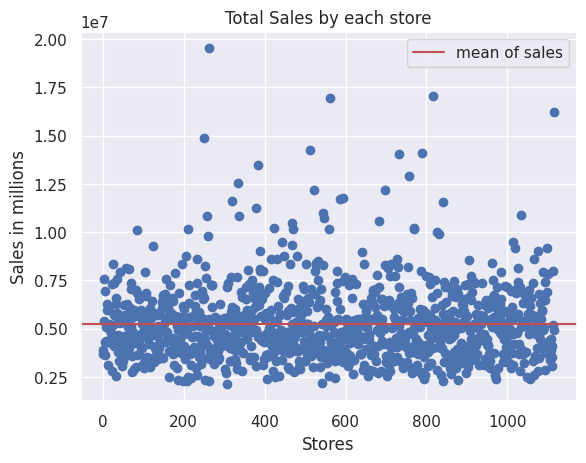

In [ ]:
plt.scatter(new_df.groupby(['Store'])['Sales'].sum().sort_values(ascending = False).index,new_df.groupby(['Store'])['Sales'].sum().sort_values(ascending = False).values)
plt.axhline(np.mean(new_df.groupby(['Store'])['Sales'].sum().sort_values(ascending = False).values),color = 'r',label = 'mean of sales')
plt.title('Total Sales by each store')
plt.xlabel('Stores')
plt.ylabel('Sales in millions')
plt.legend()

##### 1. Why did you pick the specific chart?

The chart shows the mean of overall sales . The shows the number of outperforming stores.The chart shows the overall distribution of sales for all stores.

##### 2. What is/are the insight(s) found from the chart?

The mean value of sales is around 500,000 .

Majority of stores of total sales in the range of 250,000 to 750,000

We have few outperforming store who have total sales greater than even 1 million .

The max value of total sales of a store is around 2 million.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

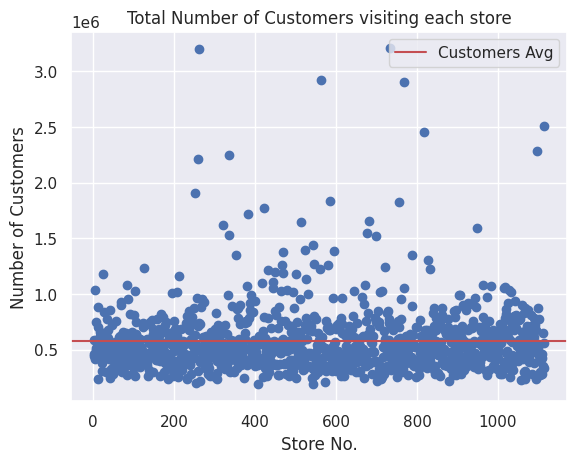

In [ ]:
plt.scatter(new_df.groupby(['Store'])['Customers'].sum().sort_values(ascending=False).index , new_df.groupby(['Store'])['Customers'].sum().sort_values(ascending=False).values)
plt.axhline(np.mean(new_df.groupby(['Store'])['Customers'].sum().sort_values(ascending = False).values),color = 'r',label = 'Customers Avg')
plt.title('Total Number of Customers visiting each store')
plt.xlabel('Store No.')
plt.ylabel('Number of Customers')
plt.legend()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

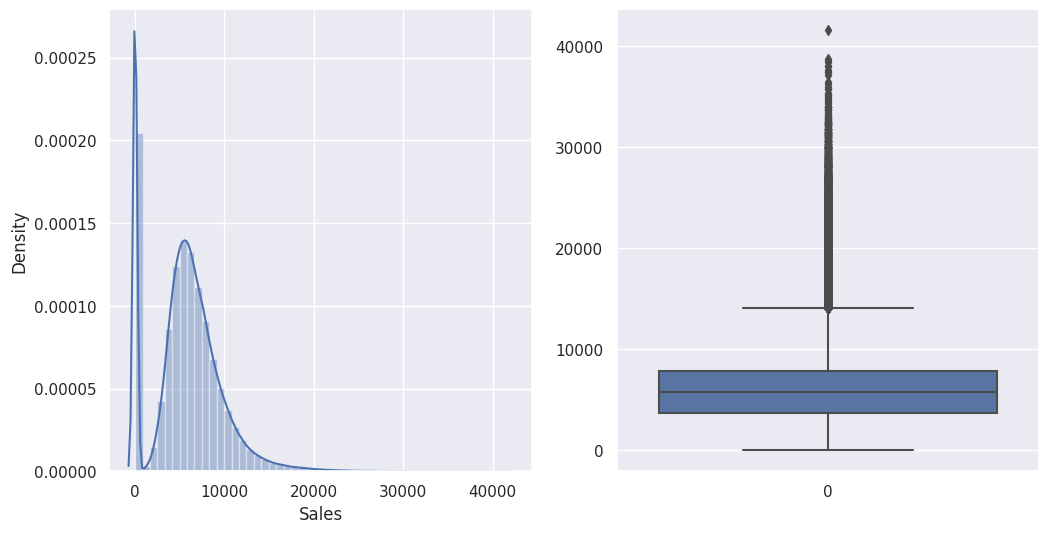

In [ ]:
# analysis of dependent variable -- Sales
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
sns.distplot(new_df['Sales'])
plt.subplot(1,2,2)
sns.boxplot(new_df['Sales'])
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

In [ ]:
continuous_cols

['Customers', 'CompetitionDistance', 'Promo2SinceWeek', 'day']

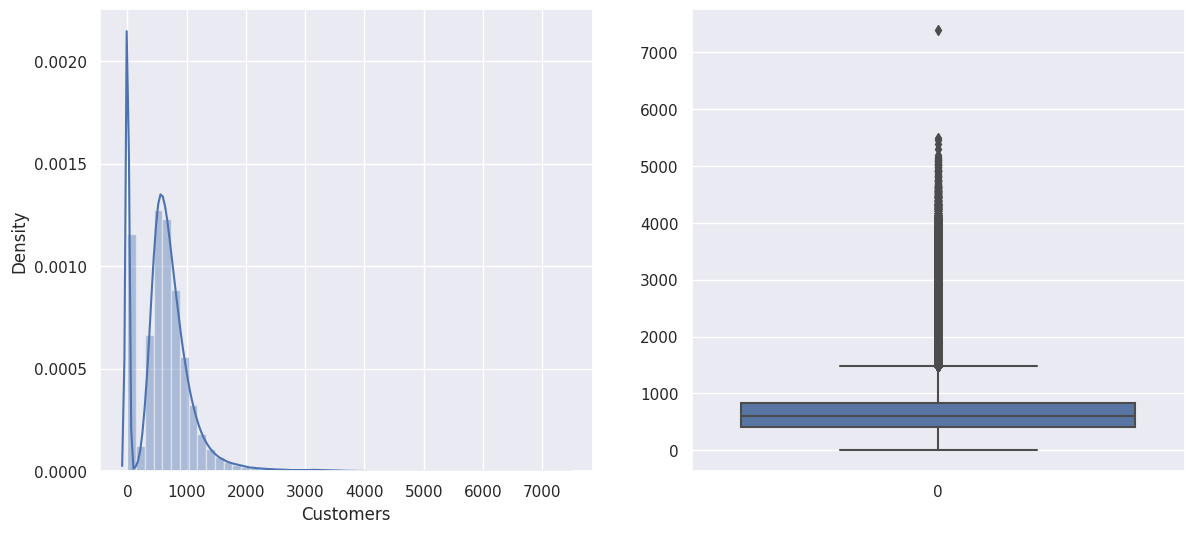

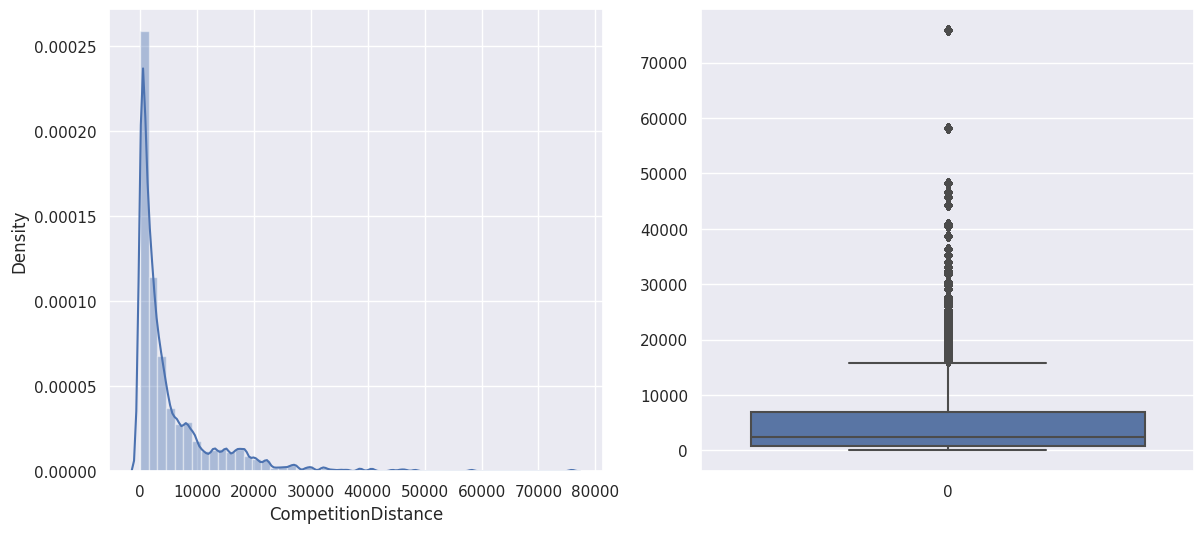

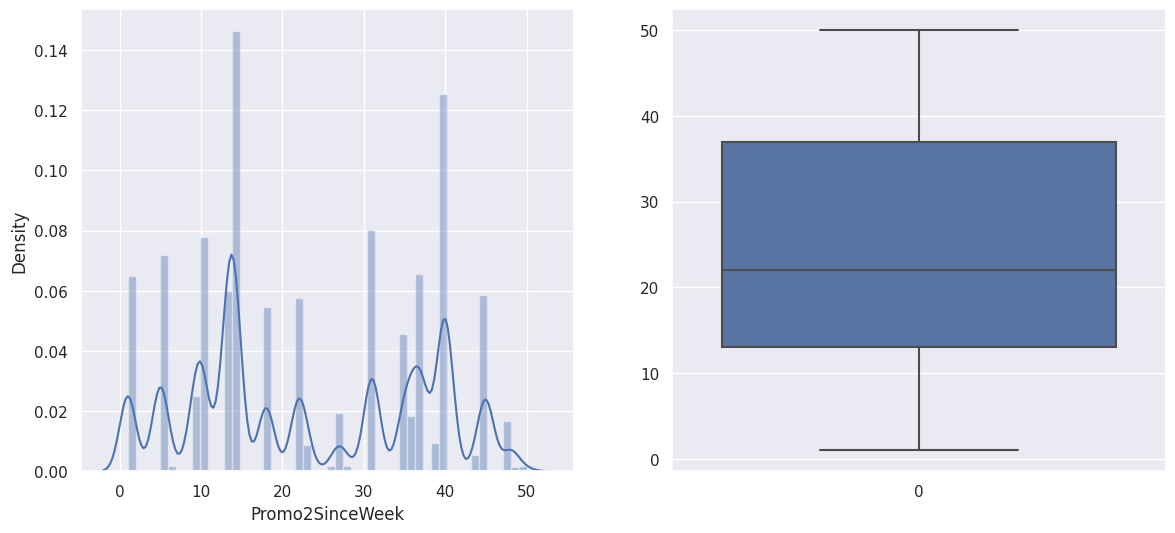

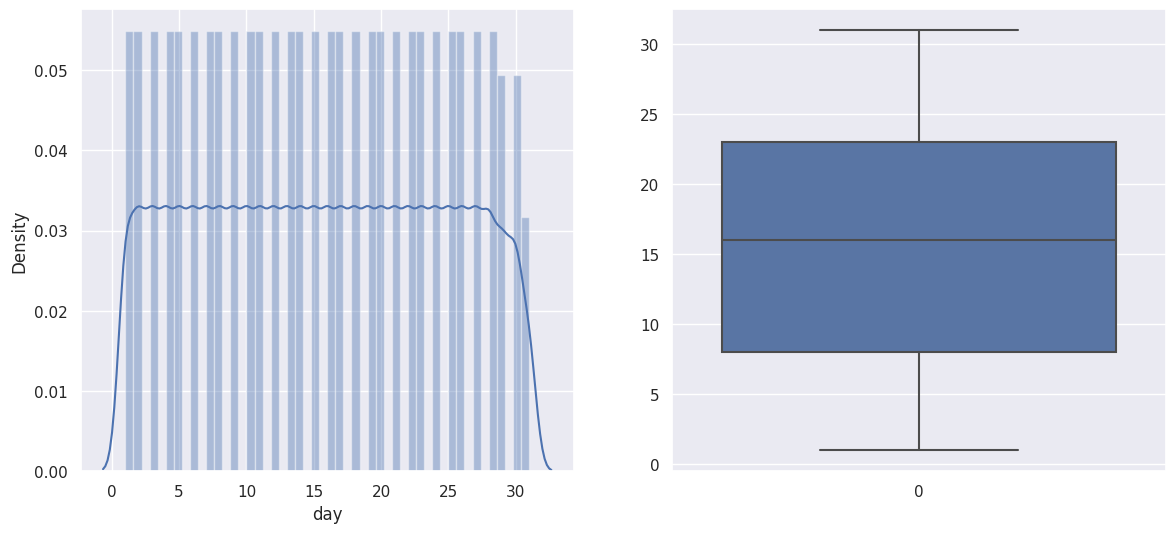

In [ ]:
# distributions of independent continuous features
for i in [col for col in continuous_cols if col not in ['Sales']] :
  plt.figure(figsize = (14,6))
  plt.subplot(1,2,1)
  sns.distplot(new_df[i])
  plt.subplot(1,2,2)
  sns.boxplot(new_df[i])
  plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

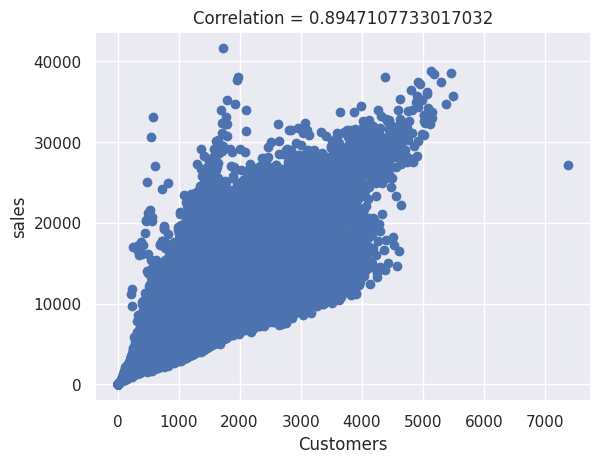

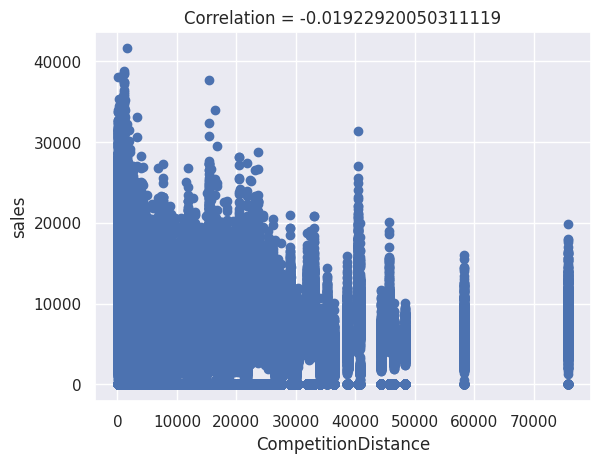

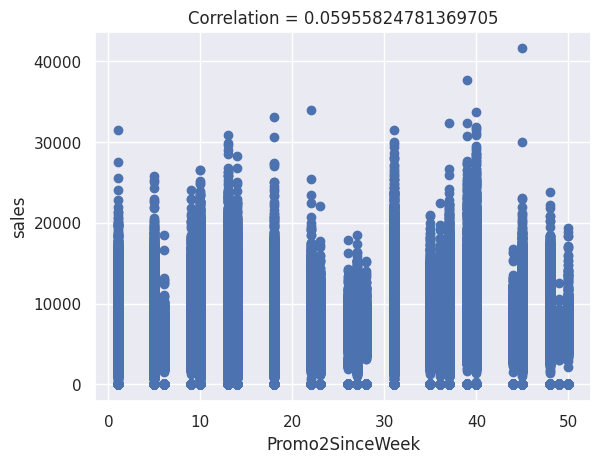

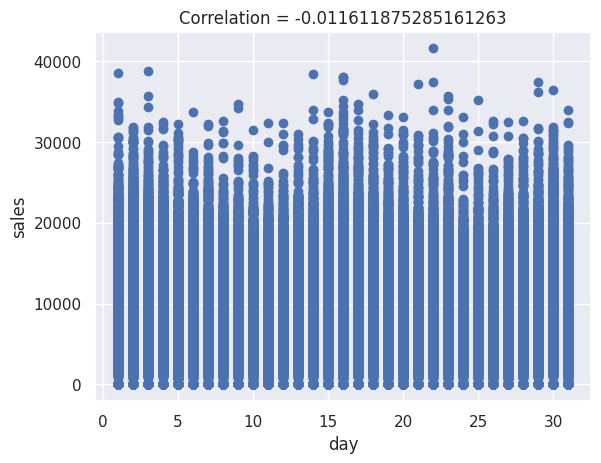

In [ ]:
# bivariate analysis of continuous cols

for i in continuous_cols:
  plt.scatter(new_df[i],new_df['Sales'])
  plt.xlabel(i)
  plt.ylabel('sales')
  corr = new_df[i].corr(new_df['Sales'])
  plt.title(f'Correlation = {corr}')
  plt.show()

##### 1. Why did you pick the specific chart?

Scatter plots give the relationship direction btw dependent and independent variables . This gave the overview relation btw continuous and dep. var.

##### 2. What is/are the insight(s) found from the chart?

1 - we see +ve linear relationship btw customers and sales . which is very obvious

2 --

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [ ]:
# univariate analysis of discrete numerical columns

plt.figure(figsize = (14,5))
for i in discrete_cols:
  plt.figure(figsize = (14,5))
  plt.subplot(1,3,1)
  sns.countplot(new_df[i])
  plt.subplot(1,3,2)
  plt.boxplot(new_df[i])
  plt.subplot(1,3,3)
  plt.hist(new_df[i])
  plt.show()


NameError: ignored

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [ ]:
# bivariate analysis discrete numerical cols
plt.figure(figsize = (14,6))
for i in discrete_cols :
  plt.subplot(1,3,1)
  plt.scatter(new_df[i],new_df['Sales'])
  z = np.polyfit(new_df[i],new_df['Sales'],1)
  yhat = np.poly1d(z)(new_df[i])
  plt.plot(new_df[i],yhat)
  plt.subplot(1,3,2)
  plt.bar(new_df[i] , new_df['Sales'])
  plt.subplot(1,3,3)
  plt.boxplot(new_df[i],new_df['Sales'])
  plt.show()


NameError: ignored

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [ ]:
# univariate analysis for categorical_cols

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# bivariate analysis for categorical cols


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Multivariate analysis

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation



one hot encoding on storetype and assortment , stateholiday , promoInterval


missing value imputation and removal

scaling

In [ ]:
new_df.isnull().sum()

Store                             0
DayOfWeek                         0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
year                              0
month                             0
day                               0
dtype: int64

In [ ]:
new_df.drop(['Store'],axis = 1 , inplace  = True)

In [ ]:
new_df.head(5)

,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,year,month,day
0,5,5263,555,1,1,None,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,31
1,5,6064,625,1,1,None,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31
2,5,8314,821,1,1,None,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31
3,5,13995,1498,1,1,None,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN,2015,7,31
4,5,4822,559,1,1,None,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN,2015,7,31


In [ ]:
# categorical , discrete  , continuous
# column_restruc =


In [ ]:
# CompetitionDistance is a numerical column which provides the distance from the competition store. Nan values represents the absence of any competition for the stores
# we can cross check it by looking into associated CompetitionOpenSinceYear values for the observations with null values in CompetitionDistance .
# if they are associated with CompetitionOpenSinceYear having null values , then our implication is true.

new_df[new_df['CompetitionDistance'].isnull()]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,5,2015-07-31,10052,973,1,1,0,1,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,5,2015-07-31,6306,540,1,1,0,1,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,5,2015-07-31,6000,466,1,1,0,0,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"
1405,291,4,2015-07-30,9030,883,1,1,0,1,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
1736,622,4,2015-07-30,5412,406,1,1,0,1,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015601,622,3,2013-01-02,4080,451,1,0,0,1,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
1015858,879,3,2013-01-02,3077,326,1,0,0,1,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"
1016385,291,2,2013-01-01,0,0,0,0,a,1,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
1016716,622,2,2013-01-01,0,0,0,0,a,1,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN


In [ ]:
# All associated CompetitionOpenSinceYear values are null.Hence our inference was correct
new_df[new_df['CompetitionDistance'].isnull()].loc[:,'CompetitionOpenSinceYear'].isnull().sum()

2642

In [ ]:
# Replacing these null values with 0
new_df.loc[new_df['CompetitionDistance'].isnull(),['CompetitionDistance','CompetitionOpenSinceMonth','CompetitionOpenSinceYear']] = 0

In [ ]:
new_df.loc[new_df['CompetitionDistance'].isnull(),['CompetitionDistance','CompetitionOpenSinceMonth','CompetitionOpenSinceYear']]

,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear


In [ ]:
new_df.isnull().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance               0
CompetitionOpenSinceMonth    320706
CompetitionOpenSinceYear     320706
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64

In [ ]:
# checking the columns CompetitionOpenSinceMonth and CompetitionOpenSinceYear with missing values . they have same number of missing values.

new_df.loc[new_df['CompetitionOpenSinceMonth'].isnull() & new_df['CompetitionOpenSinceYear'].isnull()]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
11,12,5,2015-07-31,8959,962,1,1,0,1,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
12,13,5,2015-07-31,8821,568,1,1,0,0,d,a,310.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
15,16,5,2015-07-31,10231,979,1,1,0,1,a,c,3270.0,NaN,NaN,0,NaN,NaN,NaN
18,19,5,2015-07-31,8234,718,1,1,0,1,a,c,3240.0,NaN,NaN,1,22.0,2011.0,"Mar,Jun,Sept,Dec"
21,22,5,2015-07-31,6566,633,1,1,0,0,a,a,1040.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017189,1096,2,2013-01-01,0,0,0,0,a,1,a,c,1130.0,NaN,NaN,1,10.0,2014.0,"Mar,Jun,Sept,Dec"
1017193,1100,2,2013-01-01,0,0,0,0,a,1,a,a,540.0,NaN,NaN,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [ ]:
# these are those observations where we have the presence of competetion but their opening time like month and year is not known.
# here no arbitrary value can be put because it will misrepresent data and may affect predictions.

new_df.loc[new_df['CompetitionOpenSinceMonth'].isnull() & new_df['CompetitionOpenSinceYear'].isnull()].shape[0]/ new_df.shape[0]*100

# 31% values are missing in these two columns.

31.528034061829967

<Axes: xlabel='CompetitionOpenSinceMonth', ylabel='Density'>

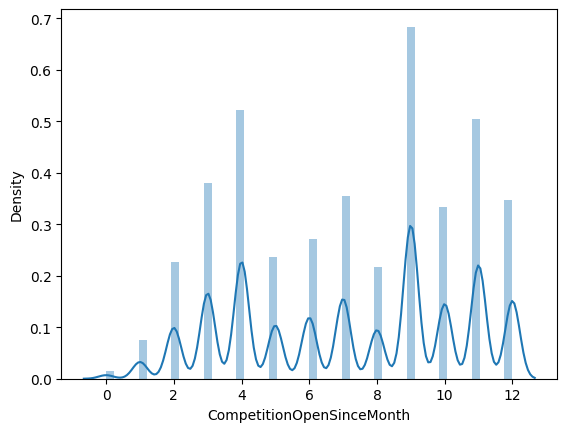

In [ ]:
# checking the distributions of these two columns

sns.distplot(new_df['CompetitionOpenSinceMonth'])

# the distribution of CompetitionOpenSinceMonth looks more or less like uniform distribution .

<Axes: xlabel='CompetitionOpenSinceYear', ylabel='Density'>

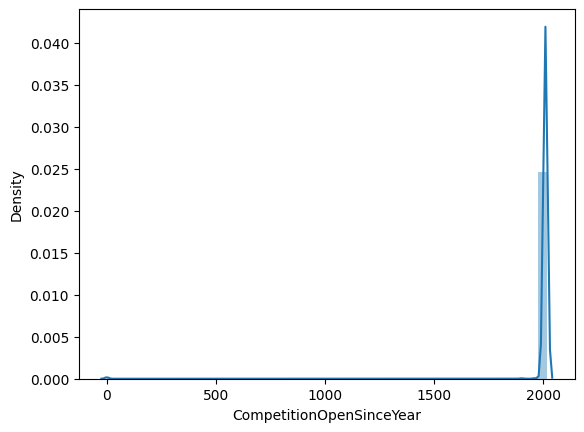

In [ ]:
sns.distplot(new_df['CompetitionOpenSinceYear'])
# highly left skewed

In [ ]:
new_df['CompetitionOpenSinceYear'].value_counts()
# Most of the observations have the CompetitionOpenSinceYear values in 2000s with peak in 2013

2013.0    75426
2012.0    74299
2014.0    63732
2005.0    56564
2010.0    51258
2009.0    49396
2011.0    49396
2008.0    48476
2007.0    43744
2006.0    42802
2015.0    35060
2002.0    24882
2004.0    19804
2003.0    16794
2001.0    14704
2000.0     9236
1999.0     7352
1990.0     4710
0.0        2642
1994.0     1884
1995.0     1700
1961.0      942
1998.0      942
1900.0      758
Name: CompetitionOpenSinceYear, dtype: int64

In [ ]:
# we can do imputations for these two features using two good options 1) random imputations ---univariater imputer  2) knn imputer -- multivariate imputer

In [ ]:
pip install feature-engine

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.9/328.9 kB 4.2 MB/s eta 0:00:00


In [ ]:
# trying random imputations first


from feature_engine.imputation import RandomSampleImputer
rsi = RandomSampleImputer()
random_impute = pd.DataFrame(columns = ['CompetitionOpenSinceMonth','CompetitionOpenSinceYear'] )
random_impute[['CompetitionOpenSinceMonth']] = rsi.fit_transform(new_df[['CompetitionOpenSinceMonth']])
rsi = RandomSampleImputer()
random_impute['CompetitionOpenSinceYear'] = rsi.fit_transform(new_df[['CompetitionOpenSinceYear']])



In [ ]:
random_impute.shape

(1017209, 2)

In [ ]:
random_impute.isnull().sum()

CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
dtype: int64

In [ ]:
# code for knn imputer.
# from sklearn.impute import KNNImputer
# kn = KNNImputer()
# knn_impute = pd.DataFrame(columns=['CompetitionOpenSinceMonth','CompetitionOpenSinceYear'])



# knn_impute['CompetitionOpenSinceMonth'] = kn.fit_transform(new_df[['CompetitionOpenSinceMonth']])
# knn_impute['CompetitionOpenSinceYear'] = kn.fit_transform(new_df[['CompetitionOpenSinceYear']])


In [ ]:
new_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [ ]:
# one hot encoding on storetype and assortment , stateholiday , promoInterval

# extract year month day from date

# missing value imputation and removal

# scaling

In [ ]:
random_impute.shape

(1017209, 2)

In [ ]:
new_df.drop(['CompetitionOpenSinceMonth','CompetitionOpenSinceYear'],axis = 1,inplace = True)


In [ ]:
new_df = pd.concat([new_df,random_impute],axis = 1)

In [ ]:
new_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionOpenSinceMonth,CompetitionOpenSinceYear
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,0,NaN,NaN,NaN,9.0,2008.0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",11.0,2007.0
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",12.0,2006.0
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,0,NaN,NaN,NaN,9.0,2009.0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,0,NaN,NaN,NaN,4.0,2015.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",6.0,2014.0
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,0,NaN,NaN,NaN,4.0,2006.0
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,0,NaN,NaN,NaN,7.0,2005.0
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,0,NaN,NaN,NaN,9.0,2014.0


#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***